In [40]:
!pip -q install plotly --upgrade

Importing libraries

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [42]:
dataframe = pd.read_csv('../dataset/labor.csv', sep=';')
dataframe

,age,sex,'on thyroxine','query on thyroxine','on antithyroid medication',sick,pregnant,'thyroid surgery','I131 treatment','query hypothyroid',...,'TT4 measured',TT4,'T4U measured',T4U,'FTI measured',FTI,'TBG measured',TBG,'referral source',Class
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,negative
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,negative
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,negative
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,negative
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,58,F,f,f,f,f,f,f,t,f,...,t,122,t,1.12,t,108,f,?,other,negative
3768,52,M,f,f,f,f,f,f,t,f,...,t,92,t,0.76,t,121,f,?,other,negative
3769,75,F,f,f,f,f,f,f,t,f,...,t,151,t,1.13,t,134,f,?,other,negative
3770,52,M,f,f,f,f,f,t,t,f,...,t,86,t,0.77,t,112,f,?,other,negative


**Tratamento de linhas que contenhaam o '?'**

Vamos substituir todas as interrogações por 'NAN'

In [43]:
import numpy as np
# Substitui Nan por um caracter desejado
dataframe.replace('?', np.nan, inplace = True) # inplace = True também altera na base, não só na memória

**Converting objects data type into float 64 (only the com NaN)**

In [44]:
#dataframe["age"].astype(np.float)
#dataframe["TT4"].astype(np.float64)
#dataframe["FTI"].astype(np.float64)

**Excluindo colunas -atributos- com mais de 85% de valores ausentes**

In [45]:
limite = dataframe.shape[0]*0.85
drop_columns = []
quant_isnull = dataframe.isnull().sum()
columns = dataframe.columns
for q,c in zip(quant_isnull,columns):
  if q >= limite :
    drop_columns.append(c)

In [46]:
# printing all columns of the dataframe
print(dataframe.columns.tolist())

['age', 'sex', "'on thyroxine'", "'query on thyroxine'", "'on antithyroid medication'", 'sick', 'pregnant', "'thyroid surgery'", "'I131 treatment'", "'query hypothyroid'", "query hyperthyroid'", 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', "'TSH measured'", 'TSH', "'T3 measured'", 'T3', "'TT4 measured'", 'TT4', "'T4U measured'", 'T4U', "'FTI measured'", 'FTI', "'TBG measured'", 'TBG', "'referral source'", 'Class']


In [47]:
dataframe.drop(columns=drop_columns,inplace=True)
# axis (eixo) = 1, pois 1 se refere às colunas
dataframe.drop(["\'query hypothyroid\'"], axis=1, inplace=True) # coluna duplicada
dataframe.drop(["\'TBG measured\'"], axis=1, inplace=True) # coluna com apenas um valor
dataframe.shape

(3772, 27)

**Excluindo linhas com 50% ou mais valores ausentes**

In [48]:
limite = dataframe.shape[1]*0.5
dataframe.dropna(thresh=limite,inplace=True)
dataframe.shape

(3772, 27)

**Vamos verificar a quantidade de valores não NaN ?**

In [49]:
dataframe.isnull().sum()

age                              1
sex                            150
'on thyroxine'                   0
'query on thyroxine'             0
'on antithyroid medication'      0
sick                             0
pregnant                         0
'thyroid surgery'                0
'I131 treatment'                 0
query hyperthyroid'              0
lithium                          0
goitre                           0
tumor                            0
hypopituitary                    0
psych                            0
'TSH measured'                   0
TSH                            369
'T3 measured'                    0
T3                             769
'TT4 measured'                   0
TT4                            231
'T4U measured'                   0
T4U                            387
'FTI measured'                   0
FTI                            385
'referral source'                0
Class                            0
dtype: int64

**Verificar, em %, quantos dados NaN existem na coluna em relação ao total de linhas**

Número de linhas NaN <br>
______________________ * 100<br>
Número total de linhas <br> <br>

In [50]:
dataframe.isnull().sum()/dataframe.shape[0]*100

age                             0.026511
sex                             3.976670
'on thyroxine'                  0.000000
'query on thyroxine'            0.000000
'on antithyroid medication'     0.000000
sick                            0.000000
pregnant                        0.000000
'thyroid surgery'               0.000000
'I131 treatment'                0.000000
query hyperthyroid'             0.000000
lithium                         0.000000
goitre                          0.000000
tumor                           0.000000
hypopituitary                   0.000000
psych                           0.000000
'TSH measured'                  0.000000
TSH                             9.782609
'T3 measured'                   0.000000
T3                             20.387063
'TT4 measured'                  0.000000
TT4                             6.124072
'T4U measured'                  0.000000
T4U                            10.259809
'FTI measured'                  0.000000
FTI             

In [51]:
dataframe.dtypes

age                            object
sex                            object
'on thyroxine'                 object
'query on thyroxine'           object
'on antithyroid medication'    object
sick                           object
pregnant                       object
'thyroid surgery'              object
'I131 treatment'               object
query hyperthyroid'            object
lithium                        object
goitre                         object
tumor                          object
hypopituitary                  object
psych                          object
'TSH measured'                 object
TSH                            object
'T3 measured'                  object
T3                             object
'TT4 measured'                 object
TT4                            object
'T4U measured'                 object
T4U                            object
'FTI measured'                 object
FTI                            object
'referral source'              object
Class       

**Substituindo valores ausentes**

Vamos imputar nos atributos do tipo object com valores de maior frequência

In [52]:
dataframe['age'].value_counts()
dataframe['sex'].value_counts()
dataframe['T3'].value_counts()
dataframe['TT4'].value_counts()
dataframe['T4U'].value_counts()
dataframe['FTI'].value_counts()
dataframe['TSH'].value_counts()

0.2     116
1.3     105
1.1      97
1.4      91
1.5      80
       ... 
32        1
126       1
26.4      1
178       1
61        1
Name: TSH, Length: 287, dtype: int64

In [53]:
dataframe['age']= dataframe['age'].fillna('59')
dataframe['sex']= dataframe['sex'].fillna('F')
dataframe['T3']= dataframe['T3'].fillna('2')
dataframe['TT4']= dataframe['TT4'].fillna('101')
dataframe['T4U']= dataframe['T4U'].fillna('0.99')
dataframe['FTI']= dataframe['FTI'].fillna('100')
dataframe['TSH']= dataframe['TSH'].fillna('0.2')

Vamos verificar se foi feita a alteração?

In [54]:
dataframe.isnull().sum()

age                            0
sex                            0
'on thyroxine'                 0
'query on thyroxine'           0
'on antithyroid medication'    0
sick                           0
pregnant                       0
'thyroid surgery'              0
'I131 treatment'               0
query hyperthyroid'            0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
'TSH measured'                 0
TSH                            0
'T3 measured'                  0
T3                             0
'TT4 measured'                 0
TT4                            0
'T4U measured'                 0
T4U                            0
'FTI measured'                 0
FTI                            0
'referral source'              0
Class                          0
dtype: int64

**Contando e visualizando a quantidade de valores que temos em cada atributo**

In [55]:
len(np.unique(dataframe['age'])), len(np.unique(dataframe['TSH'])), len(np.unique(dataframe['T3'])), len(np.unique(dataframe['T4U'])), len(np.unique(dataframe['FTI']))

(93, 287, 69, 146, 234)

((array(['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19',
         '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29',
         '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4',
         '40', '41', '42', '43', '44', '45', '455', '46', '47', '48', '49',
         '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59',
         '6', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69',
         '7', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79',
         '8', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89',
         '90', '91', '92', '93', '94'], dtype=object),
  array([ 6,  1,  4,  4,  7, 12, 21, 22, 14, 29, 41,  4, 27, 34, 35, 45, 33,
         53, 49, 50, 61, 55, 40, 41, 44, 46, 67, 59, 51, 64, 61, 56,  1, 40,
         53, 49, 36, 44, 50,  1, 48, 51, 54, 54,  1, 53, 45, 51, 64, 63, 81,
         67, 64, 77, 96,  1, 91, 74, 75, 78, 63, 73, 50, 61, 73, 58,  5, 90,
         63, 77, 81, 56, 60, 45, 46, 50, 37

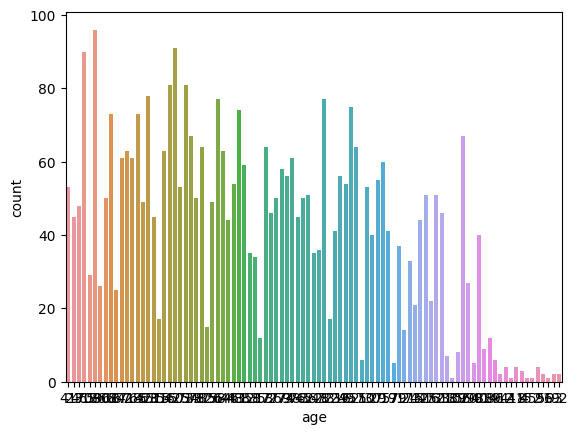

In [56]:
import seaborn as sns
np.unique(dataframe['age'], return_counts = True), sns.countplot(x = dataframe['age'])

**Contando quantidade de instâncias**

In [57]:
np.unique(dataframe['Class'], return_counts=True) 

(array(['compensated_hypothyroid', 'negative', 'primary_hypothyroid',
        'secondary_hypothyroid'], dtype=object),
 array([ 194, 3481,   95,    2], dtype=int64))

**Visualizando a quantidade de instâncias da classe**

<AxesSubplot:xlabel='Class', ylabel='count'>

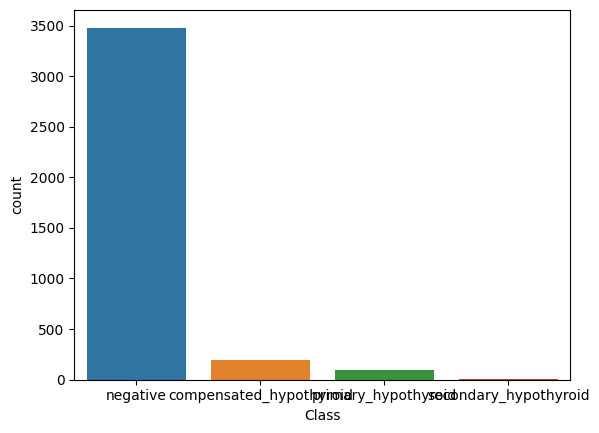

In [58]:
# A classe 'negative' é a classe majoritária
sns.countplot(x = dataframe['Class']) # base desbalanceada

Separando os atributos de entrada e de classe

In [59]:
X_prev = dataframe.iloc[:,0:28].values

Target values - Class attribute

In [60]:
y_class = dataframe.iloc[:,26].values

Tratamento de dados categóricos (strings)

In [61]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

Binarizando atributos nominais com duas opções de resposta

In [62]:
label_encoder_Sex = LabelEncoder()
label_encoder_OnThyroxine = LabelEncoder()
label_encoder_QueryOnThyroxine = LabelEncoder()
label_encoder_OnAntithyroidMedication = LabelEncoder()
label_encoder_Sick = LabelEncoder()
label_encoder_Pregnant = LabelEncoder()
label_encoder_ThyroidSurgery = LabelEncoder()
label_encoder_I131Treatment = LabelEncoder()
label_encoder_QueryHypothyroid = LabelEncoder()
label_encoder_Lithium = LabelEncoder()
label_encoder_Goitre = LabelEncoder()
label_encoder_Tumor = LabelEncoder()
label_encoder_Hypopituitary = LabelEncoder()
label_encoder_Psych = LabelEncoder()
label_encoder_TSHMeasured = LabelEncoder()
label_encoder_T3Measured = LabelEncoder()
label_encoder_TT4Measured = LabelEncoder()
label_encoder_T4UMeasured = LabelEncoder()
label_encoder_FTIMeasured = LabelEncoder()


In [63]:
X_prev[:,4] = label_encoder_Sex.fit_transform(X_prev[:,4])
X_prev[:,6] = label_encoder_OnThyroxine.fit_transform(X_prev[:,6])
X_prev[:,8] = label_encoder_QueryOnThyroxine.fit_transform(X_prev[:,8])
X_prev[:,4] = label_encoder_OnAntithyroidMedication.fit_transform(X_prev[:,4])
X_prev[:,6] = label_encoder_Sick.fit_transform(X_prev[:,6])
X_prev[:,8] = label_encoder_Pregnant.fit_transform(X_prev[:,8])
X_prev[:,4] = label_encoder_ThyroidSurgery.fit_transform(X_prev[:,4])
X_prev[:,6] = label_encoder_I131Treatment.fit_transform(X_prev[:,6])
X_prev[:,8] = label_encoder_QueryHypothyroid.fit_transform(X_prev[:,8])
X_prev[:,4] = label_encoder_Lithium.fit_transform(X_prev[:,4])
X_prev[:,6] = label_encoder_Goitre.fit_transform(X_prev[:,6])
X_prev[:,8] = label_encoder_Tumor.fit_transform(X_prev[:,8])
X_prev[:,8] = label_encoder_Hypopituitary.fit_transform(X_prev[:,8])
X_prev[:,8] = label_encoder_Psych.fit_transform(X_prev[:,8])
X_prev[:,8] = label_encoder_TSHMeasured.fit_transform(X_prev[:,8])
X_prev[:,8] = label_encoder_T3Measured.fit_transform(X_prev[:,8])
X_prev[:,8] = label_encoder_TT4Measured.fit_transform(X_prev[:,8])
X_prev[:,8] = label_encoder_T4UMeasured.fit_transform(X_prev[:,8])
X_prev[:,8] = label_encoder_FTIMeasured.fit_transform(X_prev[:,8])